In [1]:
# load pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# load the dataset
df = pd.read_csv('data/plate_1/diannsummary/diann_report.unique_genes_matrix.tsv', sep='\t')


In [5]:
df.head()

,Genes,20241127_Scapis_DIA_P1B10.mzML,20241127_Scapis_DIA_P1B2.mzML,20241127_Scapis_DIA_P1B4.mzML,20241127_Scapis_DIA_P1A4.mzML,20241127_Scapis_DIA_P1B3.mzML,20241127_Scapis_DIA_P1B11.mzML,20241127_Scapis_DIA_P1B12.mzML,20241127_Scapis_DIA_P1A11.mzML,20241127_Scapis_DIA_P1A10.mzML,...,20241127_Scapis_DIA_P1H6.mzML,20241127_Scapis_DIA_P1H1.mzML,20241127_Scapis_DIA_P1E9.mzML,20241127_Scapis_DIA_P1H8.mzML,20241127_Scapis_DIA_P1G4.mzML,20241127_Scapis_DIA_P1H3.mzML,20241127_Scapis_DIA_P1H7.mzML,20241127_Scapis_DIA_P1H2.mzML,20241127_Scapis_DIA_P1H11.mzML,20241127_Scapis_DIA_P1H9_20241129113823.mzML
0,A1BG,4649770.0,4952960.0,4641070.0,3944320.0,5302630.0,5298060.0,4234510.0,4471800.0,5845090.0,...,4816530.0,5181880.0,5553770.0,4648390.0,4474500.0,3645070.0,5153870.0,3826850.0,4255760.0,4082650.0
1,A2M,29081000.0,37853500.0,35498000.0,31877400.0,33610000.0,28347700.0,38532700.0,27022300.0,34280900.0,...,33163600.0,28581400.0,25564000.0,34357100.0,25004100.0,27614800.0,23417600.0,36369700.0,18278600.0,31745600.0
2,AFM,2728300.0,2844190.0,4536440.0,2380250.0,3113180.0,2713920.0,2798340.0,2386390.0,2773470.0,...,2896150.0,3389140.0,5115710.0,2991010.0,2120140.0,2299340.0,2832900.0,2709590.0,3370900.0,3520490.0
3,AGT,1512500.0,1376770.0,1498480.0,1756820.0,1865590.0,1820270.0,2239130.0,2181890.0,2222410.0,...,1535790.0,1495780.0,1986130.0,1761910.0,1375530.0,1609700.0,1407430.0,1454560.0,1637080.0,2283260.0
4,AHSG,6060350.0,4751270.0,5790280.0,3741330.0,5596820.0,5471120.0,5887990.0,4806990.0,4263780.0,...,5081730.0,6277570.0,7941170.0,5082830.0,2844550.0,4641680.0,5474700.0,4590260.0,5616420.0,5019310.0


In [ ]:
# For all columns except 'Genes' plot boxplot 
for col in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Intensity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'plots/boxplot_{col}.png')
    plt.close()  # Close the figure to free memory
# For all columns except 'Genes' plot histogram 
for col in df.columns[1:]:
    plt.figure(figsize=(10, 6))
    df[col].hist(bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'plots/histogram_{col}.png')
    plt.close()  # Close the figure to free memory
# For all columns except 'Genes' plot scatter plot

In [13]:
# Gather all samples into a single column
df_melted = df.melt(id_vars=['Genes'], var_name='Sample', value_name='Intensity')
# Extract column and row in the plate 
df_melted['Col'] = df_melted['Sample'].str.extract(r'P1([a-zA-Z]+)\d')
df_melted['Row'] = df_melted['Sample'].str.extract(r'(\d+)\.mzML')
df_melted.head()

,Genes,Sample,Intensity,Col,Row
0,A1BG,20241127_Scapis_DIA_P1B10.mzML,4649770.0,B,10
1,A2M,20241127_Scapis_DIA_P1B10.mzML,29081000.0,B,10
2,AFM,20241127_Scapis_DIA_P1B10.mzML,2728300.0,B,10
3,AGT,20241127_Scapis_DIA_P1B10.mzML,1512500.0,B,10
4,AHSG,20241127_Scapis_DIA_P1B10.mzML,6060350.0,B,10


In [16]:
# Count row A
row_counts = df_melted['Row'].value_counts().sort_index()
print(row_counts)

Row
1                 1752
10                1752
11                1752
12                1752
2                 1752
20241128161332     219
20241129113823     219
3                 1752
4                 1752
5                 1752
6                 1752
7                 1752
8                 1752
9                 1533
Name: count, dtype: int64


<Figure size 1200x800 with 0 Axes>

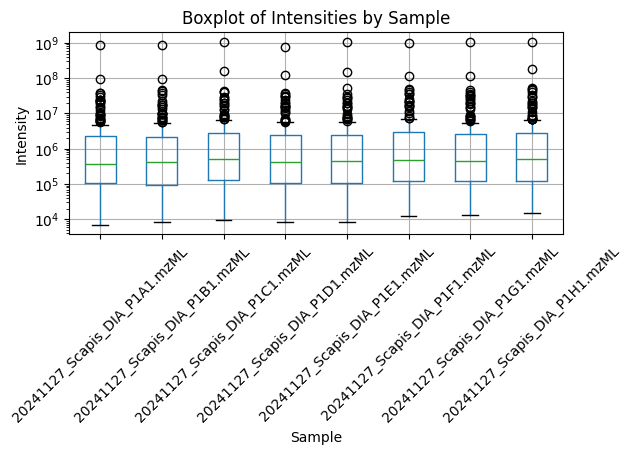

In [17]:
row_a = df_melted[df_melted['Row'] == '1']

# Plot boxplot of intensities for each sample
plt.figure(figsize=(12, 8))
row_a.boxplot(column='Intensity', by='Sample')
plt.title('Boxplot of Intensities by Sample')
plt.suptitle('')    # Remove the default title  
plt.xlabel('Sample')
plt.ylabel('Intensity')
plt.xticks(rotation=45)
plt.tight_layout()
# Add log scale to y-axis
plt.yscale('log')
plt.show()